<a href="https://colab.research.google.com/github/rachPD/Covid-Vaccine-Delivery/blob/main/Final_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/final_covid.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.head()

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Mahoba,1.0,1.0,0.0,0.0,0.0,0.0,0.026,0.026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,units unclear,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,Chamoli,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,units unclear,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,Dhubri,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,units unclear,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,East Jaintia Hills,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,units unclear,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,Shahid Bhagat Singh Nagar,1.0,0.0,0.0,0.0,0.0,0.0,0.026,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,units unclear,0.0,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498


#Preprocessing

In [ ]:
df.columns

Index(['location', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'popul

In [ ]:
df.drop(columns = ['total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths',
      'icu_patients',
       'hosp_patients', 'weekly_icu_admissions',
      'weekly_hosp_admissions',
       'total_tests', 'new_tests',
       'new_tests_smoothed', 
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed'], inplace = True)

In [ ]:
df.columns

Index(['location', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients_per_million', 'hosp_patients_per_million',
       'weekly_icu_admissions_per_million',
       'weekly_hosp_admissions_per_million', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed_per_thousand',
       'tests_units', 'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [ ]:
len(df.columns)

35

### correlation matrix

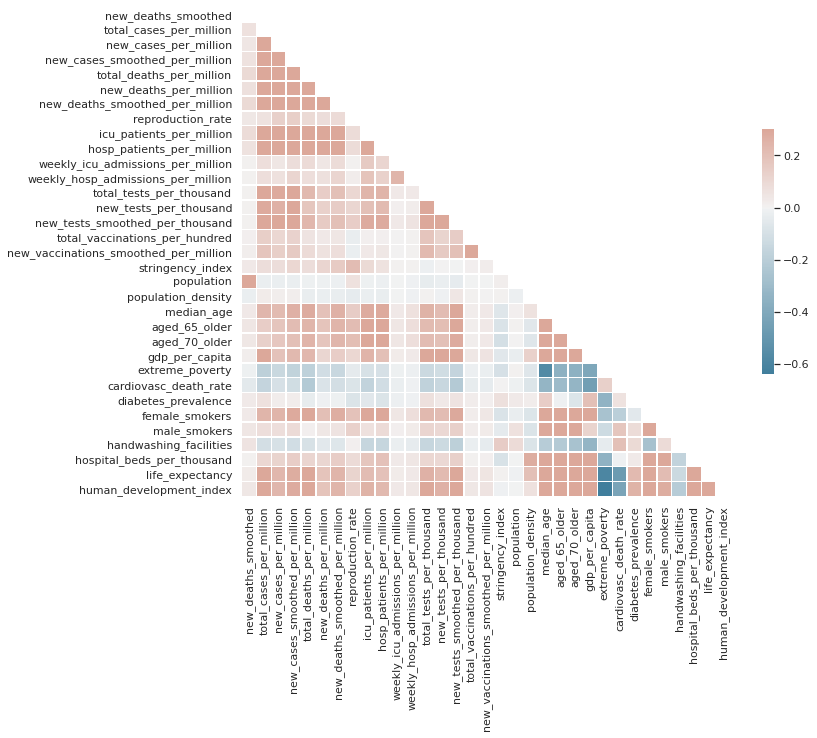

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
cr = df.corr()

In [ ]:
cols = cr.columns
d = {}
for i in cols:
    d[i] = []
for j in cols:
    k = 0
    for i in cr[j]:
         if i >= 0.75 and cols[k]!=j:
            d[j].append(cols[k])
         k = k+1
d

{'aged_65_older': ['median_age', 'aged_70_older', 'female_smokers'],
 'aged_70_older': ['median_age', 'aged_65_older'],
 'cardiovasc_death_rate': [],
 'diabetes_prevalence': [],
 'extreme_poverty': [],
 'female_smokers': ['aged_65_older'],
 'gdp_per_capita': [],
 'handwashing_facilities': [],
 'hosp_patients_per_million': [],
 'hospital_beds_per_thousand': [],
 'human_development_index': ['median_age', 'life_expectancy'],
 'icu_patients_per_million': [],
 'life_expectancy': ['median_age', 'human_development_index'],
 'male_smokers': [],
 'median_age': ['aged_65_older',
  'aged_70_older',
  'life_expectancy',
  'human_development_index'],
 'new_cases_per_million': ['new_cases_smoothed_per_million'],
 'new_cases_smoothed_per_million': ['new_cases_per_million'],
 'new_deaths_per_million': [],
 'new_deaths_smoothed': ['population'],
 'new_deaths_smoothed_per_million': [],
 'new_tests_per_thousand': ['new_tests_smoothed_per_thousand'],
 'new_tests_smoothed_per_thousand': ['total_tests_per_t

In [ ]:
df.drop(columns = ['new_deaths_smoothed','new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million','median_age','weekly_icu_admissions_per_million',
       'weekly_hosp_admissions_per_million', 'aged_70_older', 'total_tests_per_thousand',  'population', 'total_vaccinations_per_hundred','weekly_icu_admissions_per_million',
       'weekly_hosp_admissions_per_million','new_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'total_vaccinations_per_hundred',], inplace=True)

In [ ]:
df.columns

Index(['location', 'total_cases_per_million', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients_per_million', 'hosp_patients_per_million', 'tests_units',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population_density', 'aged_65_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [ ]:
len(df.columns)

22

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['tests_units'] = LE.fit_transform(df['tests_units'])
df['location'] = LE.fit_transform(df['location'])

new_df = df
region = df['location']
df.drop(columns=['location'], inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

#K-means Clustering

##Selecting the value of K from elbow curve

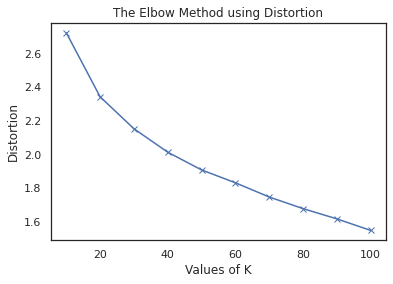

In [ ]:
### SKIP ###

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = [10,20,30,40,50,60,70,80,90,100]
X = scaled_features

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [ ]:
from sklearn.cluster import KMeans
x = time.time()
kmeans = KMeans(n_clusters=20, random_state=42).fit(scaled_features)
time.time() - x

6.735351324081421

In [ ]:
kmeans.n_iter_

28

In [ ]:
clusters = kmeans.labels_


In [ ]:
import time
x = time.time()
kmeans.predict(scaled_features[0].reshape(1,-1))
time.time() - x

0.0049207210540771484

In [ ]:
mp = {}
for i in range(20):
    mp[i] = 0
for i in range(len(df)):
   mp[clusters[i]] = mp[clusters[i]]+1
mp

{0: 332,
 1: 1934,
 2: 6224,
 3: 3983,
 4: 4399,
 5: 584,
 6: 2072,
 7: 3004,
 8: 1546,
 9: 324,
 10: 32,
 11: 1599,
 12: 4909,
 13: 7229,
 14: 6581,
 15: 2424,
 16: 3890,
 17: 1841,
 18: 1902,
 19: 5892}

In [ ]:
a = []
for i in range(20):
    a.append(pd.DataFrame(columns=df.columns))
for i in range(len(df)):
    a_row = pd.Series(df.iloc[i])
    row_df = pd.DataFrame([a_row])
    a[clusters[i]] = pd.concat([row_df, a[clusters[i]]], ignore_index=True)
a[0].head()

KeyboardInterrupt: ignored

In [ ]:
fts = a[0].columns

In [ ]:
fts

Index(['total_cases_per_million', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients_per_million', 'hosp_patients_per_million', 'tests_units',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population_density', 'aged_65_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [ ]:
features = [ 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients_per_million', 'hosp_patients_per_million', 'tests_units',
       'new_vaccinations_smoothed_per_million',
       'population_density', 'aged_65_older',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']

In [ ]:
from sklearn import preprocessing
for i in range(20):
    x = a[i].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    a[i] = pd.DataFrame(x_scaled, columns=fts)

In [ ]:
c = pd.read_csv('/content/colors.csv')
c.head()
colors = []
k = 1
for i in range(20):
    colors.append(c['#5d8aa8'].values[k])
    k+=30
colors

['#72a0c1',
 '#6e7f80',
 '#00f',
 '#fb607f',
 '#ffef00',
 '#fad6a5',
 '#966',
 '#013220',
 '#00ced1',
 '#967117',
 '#6c541e',
 '#6082b6',
 '#808000',
 '#a50b5e',
 '#e3ff00',
 '#9dc209',
 '#e2062c',
 '#faebd7',
 '#808000',
 '#98fb98']

In [ ]:
fts

Index(['total_cases_per_million', 'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients_per_million', 'hosp_patients_per_million', 'tests_units',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population_density', 'aged_65_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [ ]:
 # modify
plt.figure(figsize=(16,8))
k = 0

for cols in a[0].columns:
    X = []
    Y = []
    for i in range(20):
        X.append(i+1)
        Y.append(a[i][cols].mean())
    plt.plot(X, Y, color = colors[k])
    #name = 'cluster'+str(k)+'.png'
    #plt.savefig(name)
    k = k + 1
plt.legend(a[0].columns, loc='upper right')

NameError: ignored

<Figure size 1152x576 with 0 Axes>

In [ ]:
import cv2 
im = cv2.imread('cluster'+str(0)+'.png')
im.shape

In [ ]:
from google.colab import files
for i in range(20):
    files.download('cluster'+str(i)+'.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
metrics.silhouette_score(scaled_features, clusters, metric='euclidean')

0.18733110098145306

In [ ]:
metrics.calinski_harabasz_score(scaled_features, clusters)

6582.124691951645

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(scaled_features, clusters)

1.4610095741628577

##GMM clustering

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=20)
gmm.fit(scaled_features)
clusters = gmm.predict(scaled_features)

In [ ]:
mp = {}
for i in range(20):
    mp[i] = 0
for i in range(len(df)):
   mp[clusters[i]] = mp[clusters[i]]+1

b = []
for i in range(20):
    b.append(pd.DataFrame(columns=df.columns))
for i in range(len(df)):
    a_row = pd.Series(df.iloc[i])
    row_df = pd.DataFrame([a_row])
    b[clusters[i]] = pd.concat([row_df, b[clusters[i]]], ignore_index=True)
b[0].head()

,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,tests_units,new_vaccinations_smoothed_per_million,stringency_index,population_density,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,57221.243,284.654,6.850,0.00,0.0,0.0,3.0,0.0,59.219389,214.243,18.436,57410.166,0.0,99.739,5.59,0.0,4.53,83.78,0.944
1,57221.243,284.654,6.966,0.00,0.0,0.0,2.0,0.0,59.219389,214.243,18.436,57410.166,0.0,99.739,5.59,0.0,4.53,83.78,0.944
2,57221.243,284.654,6.867,0.00,0.0,0.0,2.0,0.0,60.190000,214.243,18.436,57410.166,0.0,99.739,5.59,0.0,4.53,83.78,0.944
3,48910.189,476.145,10.729,1.03,0.0,0.0,2.0,0.0,60.190000,214.243,18.436,57410.166,0.0,99.739,5.59,0.0,4.53,83.78,0.944
4,48328.650,485.917,10.861,1.03,0.0,0.0,2.0,0.0,60.190000,214.243,18.436,57410.166,0.0,99.739,5.59,0.0,4.53,83.78,0.944


In [ ]:
mp

{0: 2193,
 1: 3739,
 2: 3948,
 3: 1688,
 4: 8024,
 5: 5172,
 6: 1736,
 7: 3787,
 8: 6810,
 9: 324,
 10: 1794,
 11: 4089,
 12: 1043,
 13: 2512,
 14: 959,
 15: 4970,
 16: 1782,
 17: 1841,
 18: 1407,
 19: 2883}

In [ ]:
c = pd.read_csv('/content/colors.csv')
c.head()

,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54


In [ ]:
c.columns

Index(['air_force_blue_raf', 'Air Force Blue (Raf)', '#5d8aa8', '93', '138',
       '168'],
      dtype='object')

In [ ]:
colors = []
k = 1
for i in range(20):
    colors.append(c['#5d8aa8'].values[k])
    k+=30
colors

['#72a0c1',
 '#6e7f80',
 '#00f',
 '#fb607f',
 '#ffef00',
 '#fad6a5',
 '#966',
 '#013220',
 '#00ced1',
 '#967117',
 '#6c541e',
 '#6082b6',
 '#808000',
 '#a50b5e',
 '#e3ff00',
 '#9dc209',
 '#e2062c',
 '#faebd7',
 '#808000',
 '#98fb98']

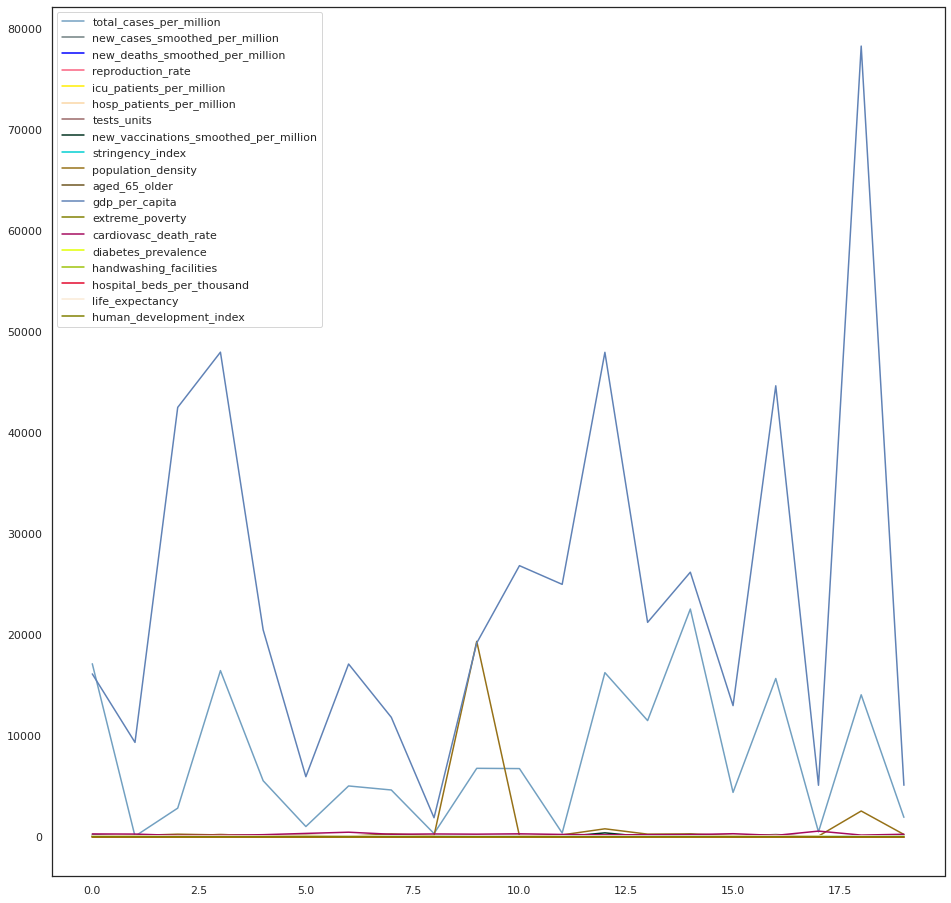

In [ ]:
plt.figure(figsize=(16,16))
k = 0
for cols in a[0].columns:
    X = []
    Y = []
    for i in range(20):
        X.append(i)
        Y.append(b[i][cols].mean())
    plt.plot(X, Y, color = colors[k])
    k = k + 1
plt.legend(b[0].columns)

In [ ]:
metrics.silhouette_score(scaled_features, gmm.predict(scaled_features), metric='euclidean')

0.08344072355547502

In [ ]:
metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features))

5193.147060827399

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(scaled_features, gmm.predict(scaled_features))

2.2435896202269396

In [ ]:
df.head()

,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,tests_units,new_vaccinations_smoothed_per_million,stringency_index,population_density,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0.026,0.0,0.0,0.0,0.0,0.0,3,0.0,8.33,54.422,2.581,1803.987,0.0,597.029,9.59,37.746,0.5,64.83,0.498
1,0.026,0.0,0.0,0.0,0.0,0.0,3,0.0,8.33,54.422,2.581,1803.987,0.0,597.029,9.59,37.746,0.5,64.83,0.498
2,0.026,0.0,0.0,0.0,0.0,0.0,3,0.0,8.33,54.422,2.581,1803.987,0.0,597.029,9.59,37.746,0.5,64.83,0.498
3,0.026,0.0,0.0,0.0,0.0,0.0,3,0.0,8.33,54.422,2.581,1803.987,0.0,597.029,9.59,37.746,0.5,64.83,0.498
4,0.026,0.0,0.0,0.0,0.0,0.0,3,0.0,8.33,54.422,2.581,1803.987,0.0,597.029,9.59,37.746,0.5,64.83,0.498


In [ ]:
len(clusters)

60701

In [ ]:
loc_dict = {}
final_dict = {}
for district in df['location'].unique():
    loc_dict[district] = {}
    for i in range(20):
        loc_dict[district][i] = 0
    final_dict[district] = []

for i in range(len(df)):
    loc_dict[df['location'].values[i]][clusters[i]] = loc_dict[df['location'].values[i]][clusters[i]] + 1

for district in df['location'].unique():
    sum = 0
    for i in range(20):
        sum = sum + loc_dict[district][i]
    for i in range(20):
        loc_dict[district][i] = loc_dict[district][i]/sum
        loc_dict[district][i] = loc_dict[district][i] * 100
loc_dict

{'Adilabad': {0: 8.080808080808081,
  1: 3.0303030303030303,
  2: 9.090909090909092,
  3: 11.11111111111111,
  4: 0.0,
  5: 6.0606060606060606,
  6: 10.1010101010101,
  7: 12.121212121212121,
  8: 0.0,
  9: 0.0,
  10: 4.040404040404041,
  11: 0.0,
  12: 8.080808080808081,
  13: 2.0202020202020203,
  14: 10.1010101010101,
  15: 0.0,
  16: 3.0303030303030303,
  17: 3.0303030303030303,
  18: 7.07070707070707,
  19: 3.0303030303030303},
 'Agar Malwa': {0: 12.162162162162163,
  1: 4.054054054054054,
  2: 6.756756756756757,
  3: 8.108108108108109,
  4: 0.0,
  5: 1.3513513513513513,
  6: 14.864864864864865,
  7: 9.45945945945946,
  8: 0.0,
  9: 0.0,
  10: 12.162162162162163,
  11: 0.0,
  12: 8.108108108108109,
  13: 2.7027027027027026,
  14: 4.054054054054054,
  15: 1.3513513513513513,
  16: 4.054054054054054,
  17: 2.7027027027027026,
  18: 6.756756756756757,
  19: 1.3513513513513513},
 'Agra': {0: 8.333333333333332,
  1: 1.1904761904761905,
  2: 9.523809523809524,
  3: 11.904761904761903,
 

In [ ]:
import ast
file = open("/content/district_coordinates.txt", "r")

contents = file.read()
cordi = ast.literal_eval(contents)

In [ ]:
type(cordi)

dict

In [ ]:
fin = {}
for dists in df['location'].unique():
     if dists in cordi.keys():
         fin[dists] = []
         fin[dists].append(cordi[dists])
         fin[dists].append(loc_dict[dists])
fin

{'Adilabad': ['19.6641° N, 78.5320° E',
  {0: 8.080808080808081,
   1: 3.0303030303030303,
   2: 9.090909090909092,
   3: 11.11111111111111,
   4: 0.0,
   5: 6.0606060606060606,
   6: 10.1010101010101,
   7: 12.121212121212121,
   8: 0.0,
   9: 0.0,
   10: 4.040404040404041,
   11: 0.0,
   12: 8.080808080808081,
   13: 2.0202020202020203,
   14: 10.1010101010101,
   15: 0.0,
   16: 3.0303030303030303,
   17: 3.0303030303030303,
   18: 7.07070707070707,
   19: 3.0303030303030303}],
 'Agar Malwa': ['23.7137° N, 76.0095° E',
  {0: 12.162162162162163,
   1: 4.054054054054054,
   2: 6.756756756756757,
   3: 8.108108108108109,
   4: 0.0,
   5: 1.3513513513513513,
   6: 14.864864864864865,
   7: 9.45945945945946,
   8: 0.0,
   9: 0.0,
   10: 12.162162162162163,
   11: 0.0,
   12: 8.108108108108109,
   13: 2.7027027027027026,
   14: 4.054054054054054,
   15: 1.3513513513513513,
   16: 4.054054054054054,
   17: 2.7027027027027026,
   18: 6.756756756756757,
   19: 1.3513513513513513}],
 'Agra': 

In [ ]:
import json

with open('location_[cordinates, clusters].json', 'w') as fp:
    json.dump(fin, fp)

In [ ]:
with open('/content/location_[cordinates, clusters].json', 'r') as fp:
    data = json.load(fp)
data

{'Adilabad': ['19.6641° N, 78.5320° E',
  {'0': 8.080808080808081,
   '1': 3.0303030303030303,
   '10': 4.040404040404041,
   '11': 0.0,
   '12': 8.080808080808081,
   '13': 2.0202020202020203,
   '14': 10.1010101010101,
   '15': 0.0,
   '16': 3.0303030303030303,
   '17': 3.0303030303030303,
   '18': 7.07070707070707,
   '19': 3.0303030303030303,
   '2': 9.090909090909092,
   '3': 11.11111111111111,
   '4': 0.0,
   '5': 6.0606060606060606,
   '6': 10.1010101010101,
   '7': 12.121212121212121,
   '8': 0.0,
   '9': 0.0}],
 'Agar Malwa': ['23.7137° N, 76.0095° E',
  {'0': 12.162162162162163,
   '1': 4.054054054054054,
   '10': 12.162162162162163,
   '11': 0.0,
   '12': 8.108108108108109,
   '13': 2.7027027027027026,
   '14': 4.054054054054054,
   '15': 1.3513513513513513,
   '16': 4.054054054054054,
   '17': 2.7027027027027026,
   '18': 6.756756756756757,
   '19': 1.3513513513513513,
   '2': 6.756756756756757,
   '3': 8.108108108108109,
   '4': 0.0,
   '5': 1.3513513513513513,
   '6': 14.

In [ ]:
len(fin)

709